# Pre-Processing

Goals:

* Load the data
* Perform basic summary statistics to get first look at the raw data
* Clean the data if required
* Understand data types
* Determine memory usage
* Compute descriptive statistics

### Load the data

In [281]:
import pandas as pd
import numpy as np

df = pd.read_excel("COM6013_-_Data_Mining_[2922]_Cancer_Data_Set_Student.xls")

### Perform basic summary statistics to get first look at raw data

In [282]:
df.shape

(891, 10)

In [283]:
df.head()


,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital,Unnamed: 8,Unnamed: 9
0,1,0.0,Gen Population,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,NaN,S = Leeds
1,2,1.0,Premium,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,NaN,C = Liverpool
2,3,1.0,Gen Population,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,NaN,Q = Bolton
3,4,1.0,Premium,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,NaN,NaN
4,5,0.0,Gen Population,"Allen, Mr. William Henry",male,35.0,8.0500,S,NaN,NaN


In [284]:
df.describe()

,PassengerID,Survived,Age,Bed Cost,Unnamed: 8
count,891.000000,599.000000,478.000000,599.000000,0.0
mean,446.000000,0.392321,30.280335,31.835503,NaN
std,257.353842,0.488676,14.763718,46.303299,NaN
min,1.000000,0.000000,1.000000,0.000000,NaN
25%,223.500000,0.000000,21.000000,7.925000,NaN
50%,446.000000,0.000000,29.000000,14.500000,NaN
75%,668.500000,1.000000,38.000000,30.500000,NaN
max,891.000000,1.000000,82.000000,512.329200,NaN


### Clean the data

Column "Unnamed: 8" is an empty column 
Column "Unnamed: 9" is a key for the different hospitals.
These are irrelevant to pre-processing of the data, so we will trim the columns and replace the Hospital column cells with their corresponding hospital from the key.

Hospital Key: S = Leeds, C = Liverpool, Q = Bolton

In [285]:
df = df.drop('Unnamed: 8', axis=1)
df = df.drop('Unnamed: 9', axis=1)
df.head()

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
0,1,0.0,Gen Population,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1.0,Premium,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1.0,Gen Population,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1.0,Premium,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0.0,Gen Population,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [286]:
df['Hospital'].replace('S', 'Leeds', inplace=True)
df['Hospital'].replace('C', 'Liverpool', inplace=True)
df['Hospital'].replace('Q', 'Bolton', inplace=True)

In [287]:
df.head()

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
0,1,0.0,Gen Population,"Braund, Mr. Owen Harris",male,22.0,7.2500,Leeds
1,2,1.0,Premium,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Liverpool
2,3,1.0,Gen Population,"Heikkinen, Miss. Laina",female,26.0,7.9250,Leeds
3,4,1.0,Premium,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Leeds
4,5,0.0,Gen Population,"Allen, Mr. William Henry",male,35.0,8.0500,Leeds


Investigate the shape and summary statistics gained fom df.shape & df.describe():

In [288]:
df.shape

(891, 8)

In [289]:
df.describe()

,PassengerID,Survived,Age,Bed Cost
count,891.000000,599.000000,478.000000,599.000000
mean,446.000000,0.392321,30.280335,31.835503
std,257.353842,0.488676,14.763718,46.303299
min,1.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,21.000000,7.925000
50%,446.000000,0.000000,29.000000,14.500000
75%,668.500000,1.000000,38.000000,30.500000
max,891.000000,1.000000,82.000000,512.329200


df.shape revealed that there are 891 rows and 8 columns.
However, in df.describe() the 'count' row is referring to the number of cells that are not null. PassengerID has 891, Survived has 599, Age has 478, Bed Cost has 599. This indicates there is missing data for many rows. We will now run df.isnull() to investigate further:

In [290]:
df.isnull()

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,True,True,True,True,True,True,True
887,False,True,True,True,True,True,True,True
888,False,True,True,True,True,True,True,True
889,False,True,True,True,True,True,True,True


We can see that the later rows are missing all data except PassengerID, indicating that there are too many PassengerIDs. We can also see that there are 121 missing 'age' values (599-478). So we can remove all the empty rows by using df.dropna(subset='Survived'). subset='Survived' ensures that rows with missing ages aren't removed at this stage.

In [291]:
df.dropna(subset='Survived', inplace=True)

### Understand Data Types and Memory Usage

df.describe() gives summary statistics on the numerical data
df.select_dtypes('object').describe().T gives summary statistics on the non numerical data

In [292]:
df.describe()

,PassengerID,Survived,Age,Bed Cost
count,599.000000,599.000000,478.000000,599.000000
mean,300.000000,0.392321,30.280335,31.835503
std,173.060683,0.488676,14.763718,46.303299
min,1.000000,0.000000,1.000000,0.000000
25%,150.500000,0.000000,21.000000,7.925000
50%,300.000000,0.000000,29.000000,14.500000
75%,449.500000,1.000000,38.000000,30.500000
max,599.000000,1.000000,82.000000,512.329200


In [293]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
Class,599,3,Gen Population,329
Full Name,599,599,"Braund, Mr. Owen Harris",1
Sex,599,2,male,375
Hospital,598,3,Leeds,428


Memory Usage in bytes:

In [294]:
df.memory_usage(deep=True)

Index           4792
PassengerID     4792
Survived        4792
Class          40889
Full Name      50309
Sex            36987
Age             4792
Bed Cost        4792
Hospital       37626
dtype: int64

In [295]:
df.memory_usage(deep=True).sum()

189771

### Visualise the raw data

#### Missing Values 

We already discovered that there are missing values in the data frame. Let's find out exactly how many?:

In [296]:
df.isna().sum()

PassengerID      0
Survived         0
Class            0
Full Name        0
Sex              0
Age            121
Bed Cost         0
Hospital         1
dtype: int64

In [297]:
df.isna().mean() * 100

PassengerID     0.000000
Survived        0.000000
Class           0.000000
Full Name       0.000000
Sex             0.000000
Age            20.200334
Bed Cost        0.000000
Hospital        0.166945
dtype: float64

Above, we can see there is one value missing in the Hospital column and around 20% empty values in the Age column.


Let's view the row with the missing value in the Hospital column and the rows with missing values in the Age column:

In [298]:
#df.query('Hospital != Hospital')

df.query('`Hospital`.isna()')

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
61,62,1.0,Premium,"Icard, Miss. Amelie",female,38.0,80.0,NaN


In [299]:
#df.query('Age != Age') This works as well

df.query('`Age`.isna()')

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
17,18,1.0,Side Ward,"Williams, Mr. Charles Eugene",male,NaN,13.0000,Leeds
19,20,1.0,Gen Population,"Masselmani, Mrs. Fatima",female,NaN,7.2250,Liverpool
26,27,0.0,Gen Population,"Emir, Mr. Farred Chehab",male,NaN,7.2250,Liverpool
28,29,1.0,Gen Population,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,7.8792,Bolton
31,32,1.0,Premium,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,146.5208,Liverpool
...,...,...,...,...,...,...,...,...
578,579,0.0,Gen Population,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,14.4583,Liverpool
584,585,0.0,Gen Population,"Paulner, Mr. Uscher",male,NaN,8.7125,Liverpool
589,590,0.0,Gen Population,"Murdlin, Mr. Joseph",male,NaN,8.0500,Leeds
593,594,0.0,Gen Population,"Bourke, Miss. Mary",female,NaN,7.7500,Bolton


On first look at the rows above, there is no obvious reason the Age or Hospital values are absent.

#### Categorical Exploration

Now we can start to visualise the data to help understand the data:

Starting with visualising the quantities of different categories.

<Axes: ylabel='Hospital'>

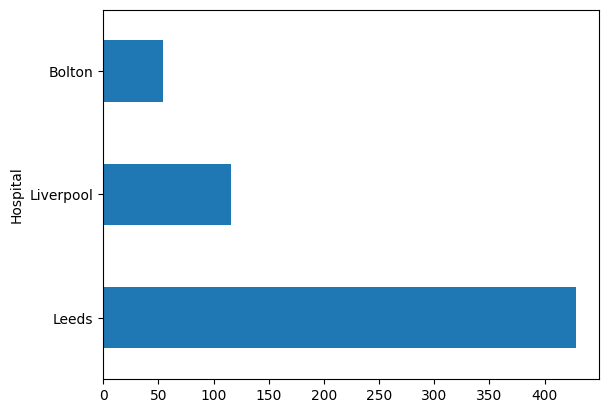

In [300]:
df['Hospital'].value_counts().plot.barh()

<Axes: ylabel='Class'>

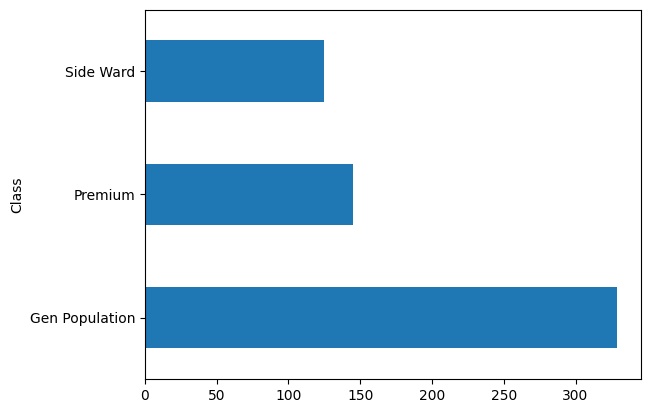

In [301]:
df['Class'].value_counts().plot.barh()

<Axes: ylabel='Survived'>

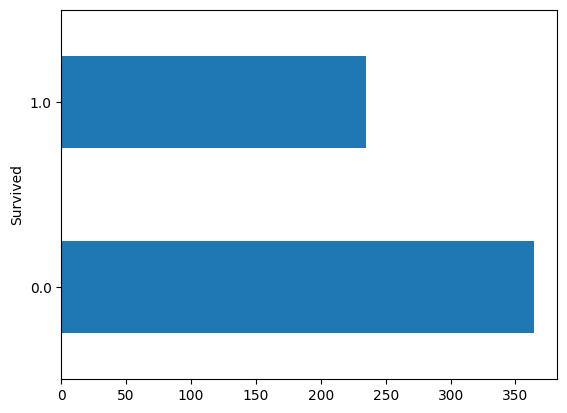

In [302]:
df['Survived'].value_counts().plot.barh()

Percentage of surviving:

In [303]:
df['Survived'].mean() * 100

39.23205342237062

<Axes: ylabel='Sex'>

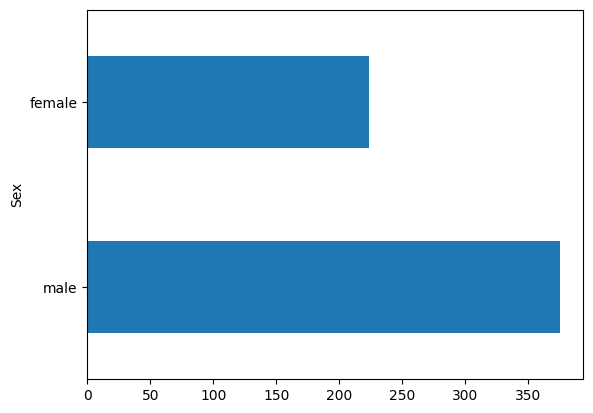

In [304]:
df['Sex'].value_counts().plot.barh()

#### Distributions

Age distribution:

<Axes: >

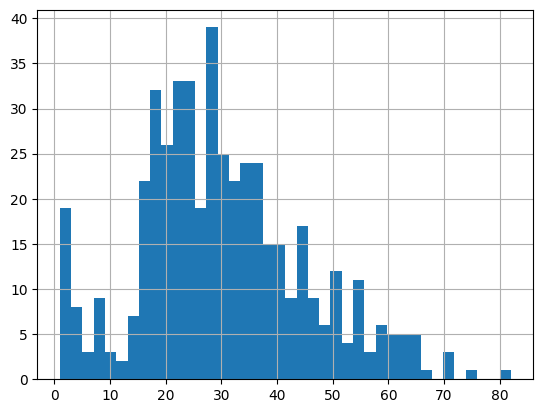

In [305]:
df['Age'].hist(bins=40)

### Compute descriptive statistics

Explore data by category:

In [306]:
with pd.option_context('display.max_columns', 100):
    display(df.groupby('Class').describe())

PassengerID                                                     \
                     count        mean         std   min    25%    50%    75%   
Class                                                                           
Gen Population       329.0  287.325228  175.506968   1.0  130.0  280.0  434.0   
Premium              145.0  323.806897  171.196658   2.0  188.0  326.0  476.0   
Side Ward            125.0  305.744000  166.734815  10.0  179.0  313.0  440.0   

                      Survived                                               \
                  max    count      mean       std  min  25%  50%  75%  max   
Class                                                                         
Gen Population  598.0    329.0  0.264438  0.441705  0.0  0.0  0.0  1.0  1.0   
Premium         599.0    145.0  0.586207  0.494219  0.0  0.0  1.0  1.0  1.0   
Side Ward       597.0    125.0  0.504000  0.501996  0.0  0.0  1.0  1.0  1.0   

                  Age                                                     \
                count       mean        std  min   25%   50%   75%   max   
Class                                                                      
Gen Population  237.0  25.734177  13.103282  1.0  19.0  24.0  32.0  75.0   
Premium         125.0  38.912000  15.124225  2.0  28.0  38.0  50.0  82.0   
Side Ward       116.0  30.267241  13.472909  1.0  23.0  30.0  36.0  66.0   

               Bed Cost                                                      \
                  count       mean        std  min      25%    50%      75%   
Class                                                                         
Gen Population    329.0  13.334168  11.065005  0.0   7.7500   8.05   15.500   
Premium           145.0  84.222815  69.511216  0.0  34.6542  66.60  106.425   
Side Ward         125.0  19.761733  11.842178  0.0  13.0000  15.00   26.000   

                          
                     max  
Class                     
Gen Population   69.5500  
Premium         512.3292  
Side Ward        73.5000

Above we can see that the survival rate average for each class: 
* Gen Population 26%, 
* Premium 58%, 
* Side Ward 50%.

Also we can see the average bed cost for each class: 
* Gen Population 13, 
* Premium 84, 
* Side Ward 19.

In [307]:
with pd.option_context('display.max_columns', 100):
    display(df.groupby('Hospital').describe())

PassengerID                                                      \
                count        mean         std  min     25%    50%     75%   
Hospital                                                                    
Bolton           54.0  284.129630  168.339846  6.0  160.75  280.0  412.75   
Leeds           428.0  300.373832  171.495954  1.0  152.75  296.5  446.25   
Liverpool       116.0  308.060345  181.105076  2.0  139.00  310.5  476.75   

                 Survived                                                 Age  \
             max    count      mean       std  min  25%  50%  75%  max  count   
Hospital                                                                        
Bolton     594.0     54.0  0.462963  0.503308  0.0  0.0  0.0  1.0  1.0   22.0   
Leeds      598.0    428.0  0.348131  0.476935  0.0  0.0  0.0  1.0  1.0  368.0   
Liverpool  599.0    116.0  0.517241  0.501871  0.0  0.0  1.0  1.0  1.0   87.0   

                                                               Bed Cost  \
                mean        std  min    25%   50%    75%   max    count   
Hospital                                                                  
Bolton     28.000000  18.097619  2.0  16.75  21.5  38.25  70.0     54.0   
Leeds      29.701087  14.239210  1.0  21.00  28.0  37.00  82.0    428.0   
Liverpool  33.218391  15.860163  1.0  22.50  30.0  44.00  75.0    116.0   

                                                                               
                mean        std     min      25%       50%      75%       max  
Hospital                                                                       
Bolton     14.044524  16.324989  6.7500   7.7500   7.75000  14.7125   90.0000  
Leeds      26.791656  36.264124  0.0000   8.0500  13.00000  26.5500  263.0000  
Liverpool  58.312356  71.919245  4.0125  13.8448  29.20625  79.2000  512.3292

Above we can see that the survival rate average for each hospital: 
* Bolton 46%,
* Leeds 35%, 
* Liverpool 52%.

We can also see the average bed cost for each hospital: 
* Bolton 14, 
* Leeds 26, 
* Liverpool 58.

# Models

Goals:

* Create classification Models to predict survival rates of patients.

### Logistic Regression

In [308]:
from matplotlib import pyplot as plt
import numpy as np

#### Binomial Logistic Regression model using the bed cost and survival rates to predict survival:

In [309]:
import statsmodels.api as sm

In [310]:
df1 = df.dropna(axis=0)

In [311]:
df1.shape

(477, 8)

In [312]:
df1.head()

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
0,1,0.0,Gen Population,"Braund, Mr. Owen Harris",male,22.0,7.2500,Leeds
1,2,1.0,Premium,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Liverpool
2,3,1.0,Gen Population,"Heikkinen, Miss. Laina",female,26.0,7.9250,Leeds
3,4,1.0,Premium,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Leeds
4,5,0.0,Gen Population,"Allen, Mr. William Henry",male,35.0,8.0500,Leeds


In [313]:
x = sm.add_constant(df['Bed Cost'])
y = df['Survived']
model = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.646643
         Iterations 5


In [314]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  599
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:                 0.03454
Time:                        18:24:37   Log-Likelihood:                -387.34
converged:                       True   LL-Null:                       -401.20
Covariance Type:            nonrobust   LLR p-value:                 1.408e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7792      0.110     -7.062      0.000      -0.995      -0.563
Bed Cost       0.0109      0.002      4.633      0.000       0.006       0.015


Predict the probability of surviving based on bed costs 31, 46, 29, 85, 62, 12, 113:

In [315]:
new_data = pd.DataFrame({'Bed Cost': [31, 46, 29, 85, 62, 12, 113]})
new_data = sm.add_constant(new_data)
pred = model.predict(new_data)
rounded_pred = round(pred)
print(rounded_pred)

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    1.0
dtype: float64


### Decision Trees

In [316]:
df.head()

,PassengerID,Survived,Class,Full Name,Sex,Age,Bed Cost,Hospital
0,1,0.0,Gen Population,"Braund, Mr. Owen Harris",male,22.0,7.2500,Leeds
1,2,1.0,Premium,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Liverpool
2,3,1.0,Gen Population,"Heikkinen, Miss. Laina",female,26.0,7.9250,Leeds
3,4,1.0,Premium,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Leeds
4,5,0.0,Gen Population,"Allen, Mr. William Henry",male,35.0,8.0500,Leeds


In [317]:
df1 = df.drop(['PassengerID', 'Full Name'], axis='columns')

In [318]:
df1.head()

,Survived,Class,Sex,Age,Bed Cost,Hospital
0,0.0,Gen Population,male,22.0,7.2500,Leeds
1,1.0,Premium,female,38.0,71.2833,Liverpool
2,1.0,Gen Population,female,26.0,7.9250,Leeds
3,1.0,Premium,female,35.0,53.1000,Leeds
4,0.0,Gen Population,male,35.0,8.0500,Leeds


Earlier we uncovered that there are missing age values and a missing hospital value in the data. We shall remove these rows for this model as it would negatively affect the results.

In [319]:
df1.dropna(inplace=True)

In [320]:
df1.query('`Age`.isna()')

,Survived,Class,Sex,Age,Bed Cost,Hospital


In [321]:
df1.query('`Hospital`.isna()')

,Survived,Class,Sex,Age,Bed Cost,Hospital


Empty rows have been removed

In [322]:
df1.Sex = df1.Sex.map({'male': 1, 'female': 2})
df1.Class = df1.Class.map({'Gen Population': 1, 'Premium': 2, 'Side Ward': 3})
df1.Hospital = df1.Hospital.map({'Liverpool': 1, 'Leeds': 2, 'Bolton': 3})

In [323]:
inputs = df1.drop('Survived', axis='columns')
target = df1.Survived

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [420]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [421]:
model.fit(X_train,y_train, )

DecisionTreeClassifier()

In [422]:
model.score(X_test,y_test)

0.7916666666666666

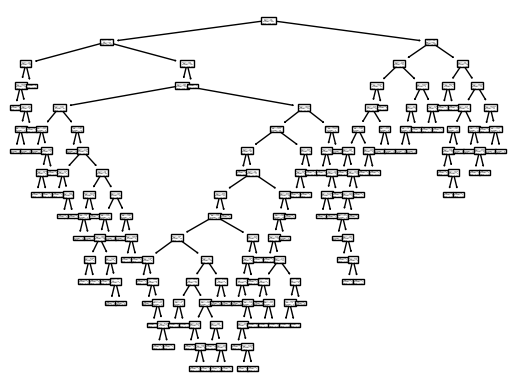

In [440]:
tree.plot_tree(model, )
plt.show()